Success
Summary statistics of the dataset
Index(['Crop Name', 'Target Yield', 'Field Size', 'pH (water)',
       'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
       Target Yield     Field Size    pH (water)  Organic Carbon  \
count  1.380200e+04   13802.000000  13776.000000    13768.000000   
mean   2.388100e+04     123.463307      6.361474       25.417940   
std    3.808466e+05    7185.915011      0.737447       22.254906   
min    1.000000e+00       0.001000      4.490000        0.900000   
25%    1.200000e+03       0.500000      5.800000       11.900000   
50%    4.500000e+03       1.000000      6.380000       19.900000   
75%    2.000000e+04       2.000000      6.890000       31.400000   
max    4.111111e+07  589674.000000      8.460000      327.200000   

       Total Nitrogen  Phospho

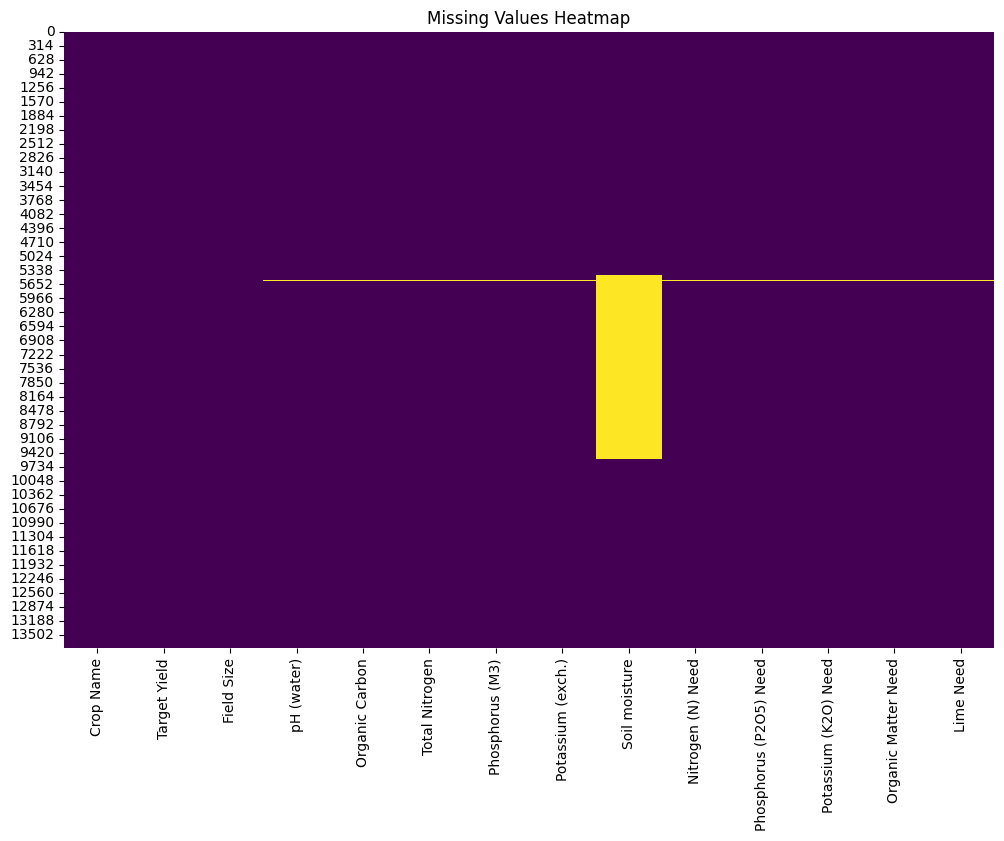

Non-zero values in each column:
Crop Name                 13802
Target Yield              13802
Field Size                13802
pH (water)                13802
Organic Carbon            13802
Total Nitrogen            13802
Phosphorus (M3)           13802
Potassium (exch.)         13802
Soil moisture             13802
Nitrogen (N) Need         13799
Phosphorus (P2O5) Need    13008
Potassium (K2O) Need       3516
Organic Matter Need       12503
Lime Need                 11990
dtype: int64
Zero values in each column:
Crop Name                     0
Target Yield                  0
Field Size                    0
pH (water)                    0
Organic Carbon                0
Total Nitrogen                0
Phosphorus (M3)               0
Potassium (exch.)             0
Soil moisture                 0
Nitrogen (N) Need             3
Phosphorus (P2O5) Need      794
Potassium (K2O) Need      10286
Organic Matter Need        1299
Lime Need                  1812
dtype: int64


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#load the dataset
for dirname,_, filenames in os.walk('../docs/Editted2.xlsx'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print("Success")
df = pd.read_excel('../docs/Editted2.xlsx')
#Summary stats of the dataset
print("Summary statistics of the dataset")
print(df.columns)
print(df.describe())
print(df.shape)
print(df.head())
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)
# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
# Non-zero & zero values count
non_zero_values = (df != 0).sum(axis=0)
print("Non-zero values in each column:")
print(non_zero_values)

zero_values = (df == 0).sum(axis=0)
print("Zero values in each column:")
print(zero_values)

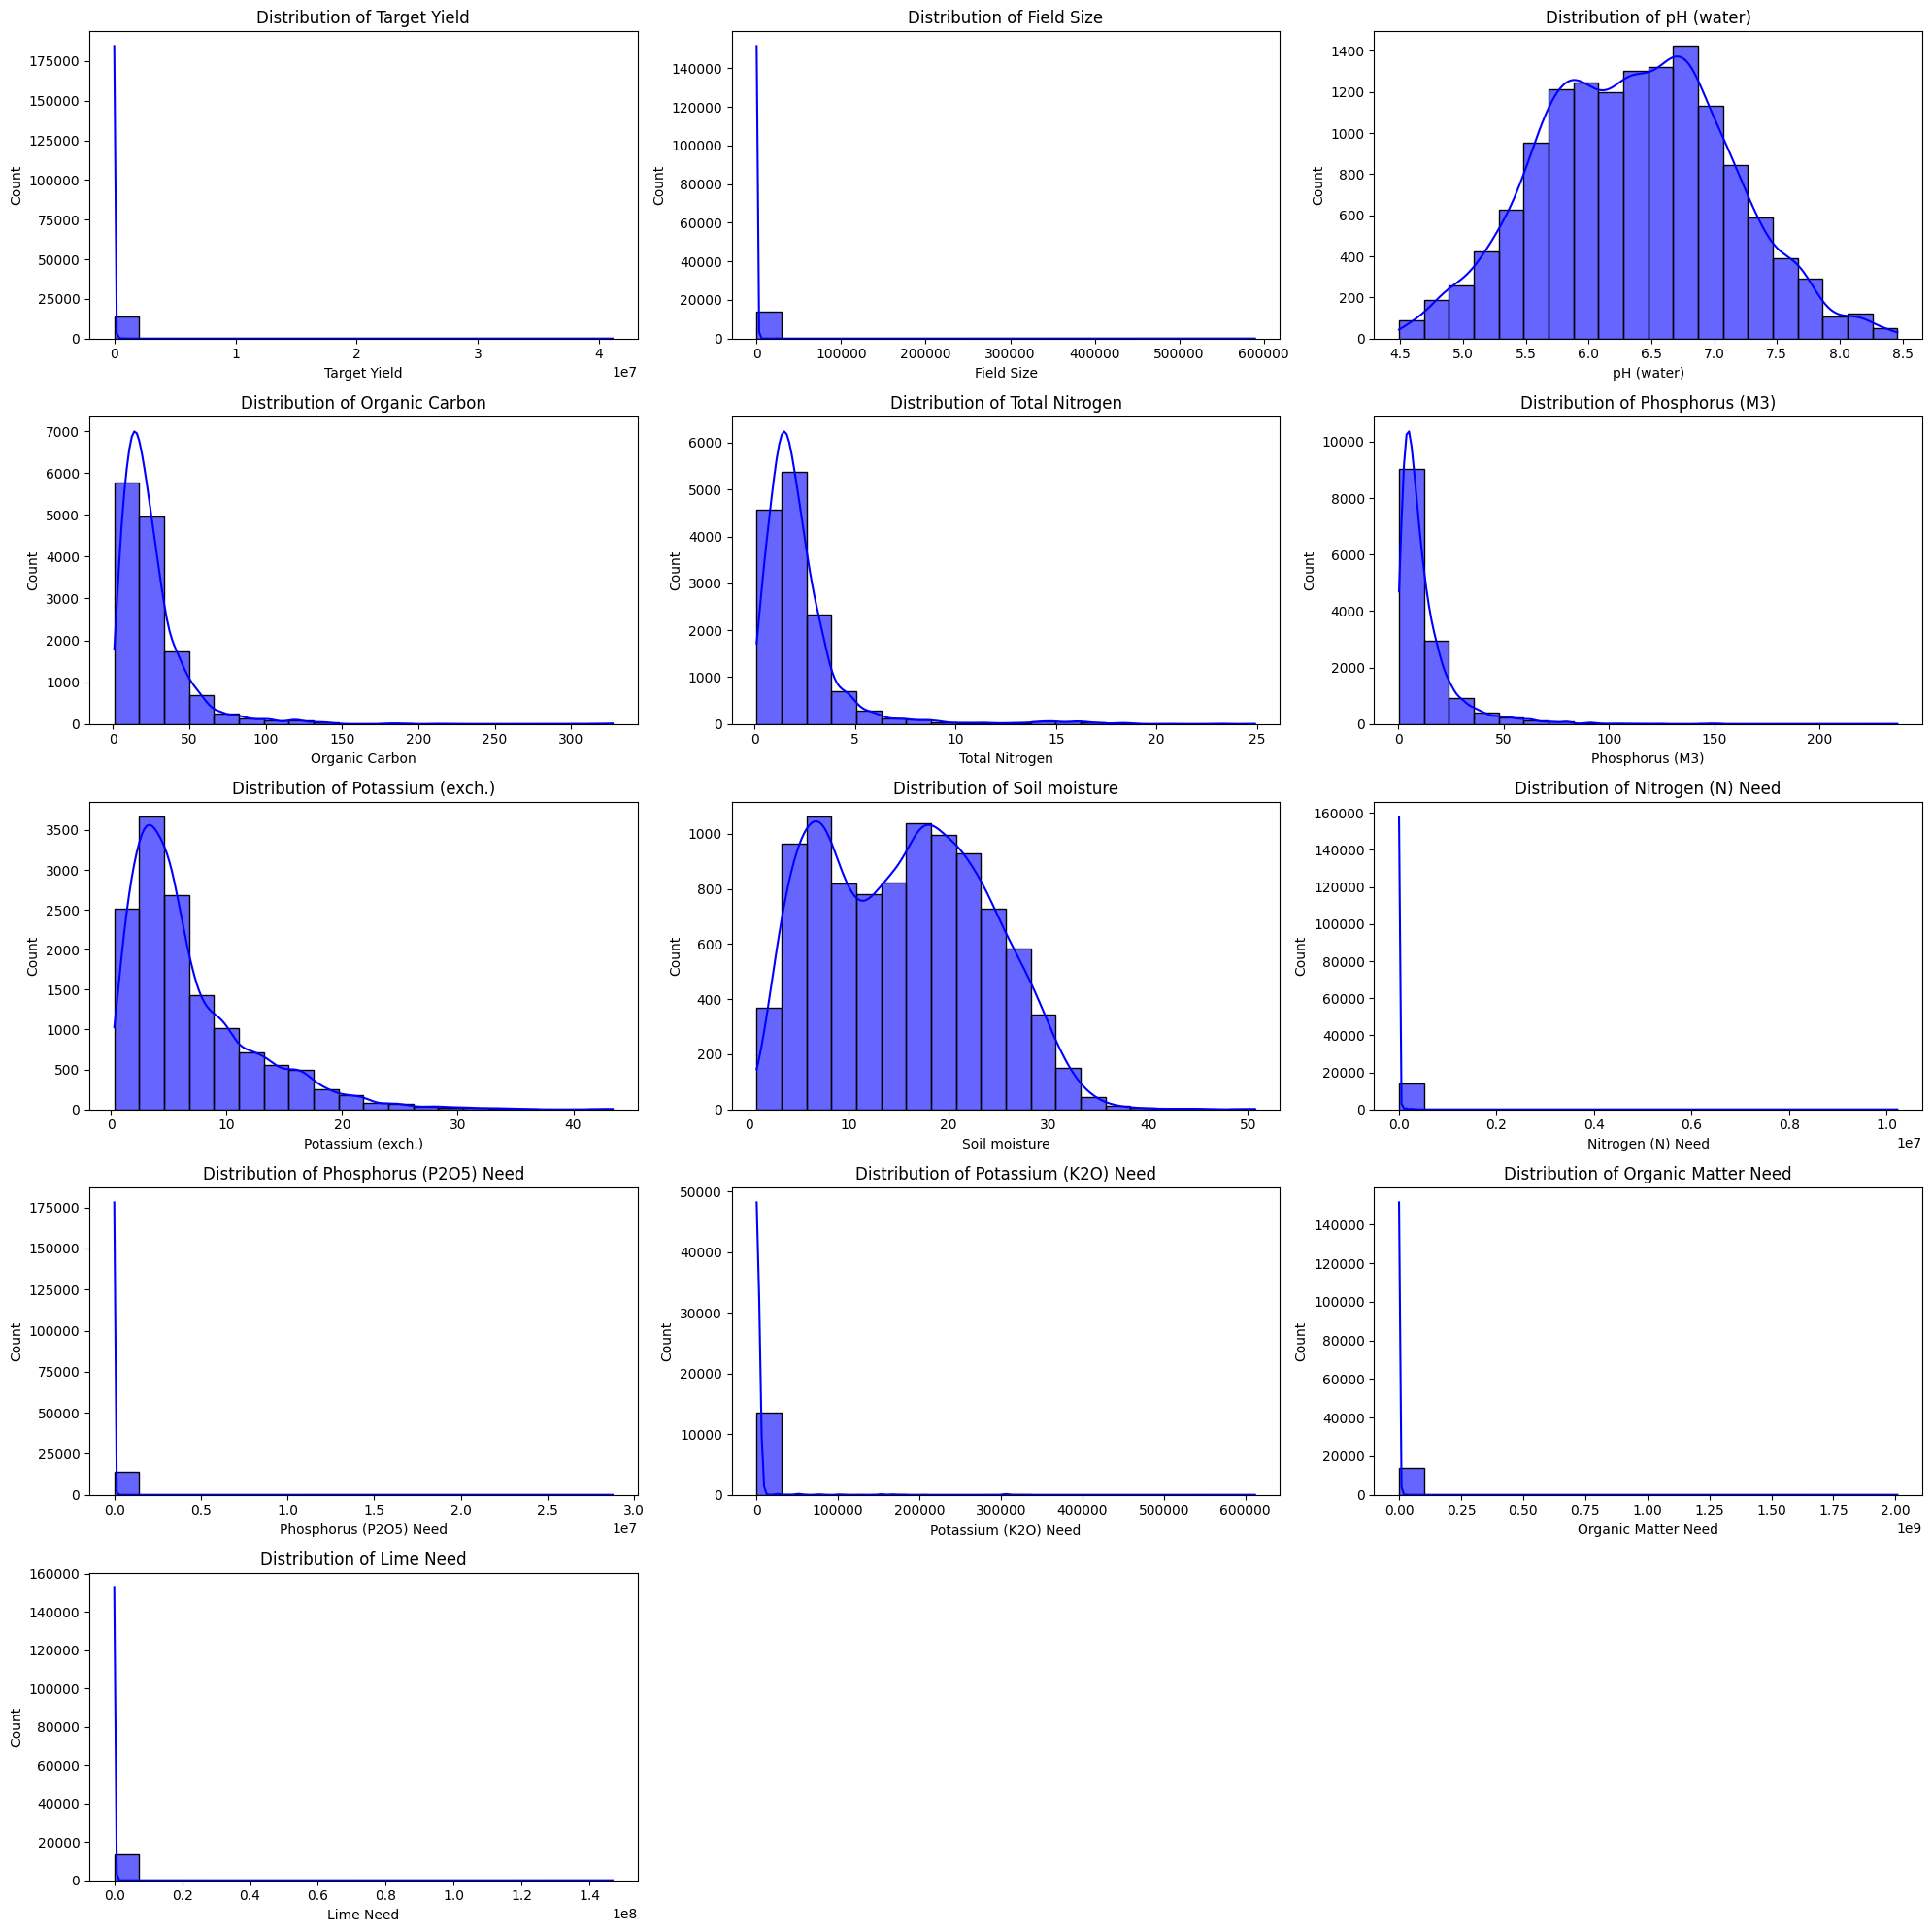

In [11]:
# Distribution of Continuous Variables
continuous_columns = ['Target Yield', 'Field Size', 'pH (water)', 'Organic Carbon', 'Total Nitrogen', 
                      'Phosphorus (M3)', 'Potassium (exch.)', 'Soil moisture', 
                      'Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 
                      'Organic Matter Need', 'Lime Need']

plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_columns):
    plt.subplot(5, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='blue', alpha=0.6)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Pairplot to explore relationships between a few key variables
pairplot_columns = ['Target Yield', 'Field Size', 'pH (water)', 'Organic Carbon', 'Total Nitrogen', 
                    'Phosphorus (M3)', 'Potassium (exch.)']
sns.pairplot(df[pairplot_columns])
plt.show()

# Boxplot for 'Crop Name' vs Continuous Variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(continuous_columns):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(x='Crop Name', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} by Crop Name')
plt.tight_layout()
plt.show()

# Correlation matrix to understand relationships between variables
plt.figure(figsize=(15, 12))
corr_matrix = df[continuous_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for specific relationships
sns.jointplot(x="Field Size", y="Target Yield", data=df, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Total Nitrogen", y="Nitrogen (N) Need", data=df, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Phosphorus (M3)", y="Phosphorus (P2O5) Need", data=df, kind='scatter', hue='Crop Name')
plt.show()

sns.jointplot(x="Potassium (exch.)", y="Potassium (K2O) Need", data=df, kind='scatter', hue='Crop Name')
plt.show()

# Lineplot for 'Organic Matter Need' over 'Field Size'
sns.lineplot(data=df, x='Field Size', y='Organic Matter Need', hue='Crop Name')
plt.title('Organic Matter Need over Field Size')
plt.show()

# Lineplot for 'Lime Need' over 'pH (water)'
sns.lineplot(data=df, x='pH (water)', y='Lime Need', hue='Crop Name')
plt.title('Lime Need over pH (water)')
plt.show()

In [3]:
import pandas as pd
df = pd.read_excel('../docs/Editted2.xlsx')
#define the X and Y features
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all specified columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features:
    print("The following input features are missing from the dataset:", missing_features)
if missing_outputs:
    print("The following output columns are missing from the dataset:", missing_outputs)

# Check for similar column names if any columns are missing
if missing_features or missing_outputs:
    print("Attempting to find similar column names for missing columns...")
    all_columns = df.columns
    similar_features = {col: [c for c in all_columns if col.lower() in c.lower()] for col in features if col not in all_columns}
    similar_outputs = {col: [c for c in all_columns if col.lower() in c.lower()] for col in output_columns if col not in all_columns}
    print("Similar input feature columns:", similar_features)
    print("Similar output columns:", similar_outputs)

if not missing_features and not missing_outputs:
    # Input features
    X = df[features].copy()
    X.fillna(0, inplace=True)

    # Output targets
    y = df[output_columns].copy()

    # Aggregate output columns to have only one row per sample
    y = y.mean(axis=1)

    # encode categorical features
    X = pd.get_dummies(X, columns=['Crop Name'])  

    # Print lengths of X, y, and df
    print("Length of X:", len(X))
    print("Length of y:", len(y))
    print("Length of df:", len(df))

    # Check if X and y have a consistent number of samples
    if len(X) == len(y):
        print("X and y have a consistent number of samples.")
        print("Number of samples:", len(X))
    else:
        print("X and y have an inconsistent number of samples.")
else:
    print("Please ensure all necessary columns are present in the dataset before proceeding.")


Length of X: 13802
Length of y: 13802
Length of df: 13802
X and y have a consistent number of samples.
Number of samples: 13802


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#import joblib

# Load your dataset from an Excel file, starting from the second row
df = pd.read_excel('../docs/Editted2.xlsx')  # Replace with the actual path

# Print the actual column names to inspect them
print("Columns in the dataset:")
print(df.columns)

# Define the input features and output target columns
features = ['Crop Name', 'Target Yield', 'Field Size',
            'pH (water)', 'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
            'Potassium (exch.)', 'Soil moisture']
output_columns = ['Nitrogen (N) Need', 'Phosphorus (P2O5) Need', 'Potassium (K2O) Need']

# Ensure all specified columns exist in the DataFrame
missing_features = [col for col in features if col not in df.columns]
missing_outputs = [col for col in output_columns if col not in df.columns]

if missing_features or missing_outputs:
    print("Missing features:", missing_features)
    print("Missing output columns:", missing_outputs)
else:
    # Input features
    X = df[features].copy()
    y = df[output_columns].copy()

    # Combine X and y to drop rows with NaN values in either
    combined = pd.concat([X, y], axis=1)
    combined.dropna(inplace=True)

    # Separate X and y again after dropping NaNs
    X = combined[features]
    y = combined[output_columns]

    # One-hot encode categorical features
    X = pd.get_dummies(X, columns=['Crop Name'])

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Save the model to a file
    #model_filename = '/home/space/Project01/docs/random_forest_model01.joblib'
    #joblib.dump(model, model_filename)
    #print(f"Model saved to {model_filename}")


    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Function to make predictions for new data
    def predict_nutrient_needs(model, input_data):
        input_df = pd.DataFrame(input_data)
        input_df = pd.get_dummies(input_df, columns=['Crop Name'])
        for col in X.columns:
            if col not in input_df.columns:
                input_df[col] = 0  # Add missing columns with default value 0
        input_df = input_df[X.columns]  # Ensure the same column order as training data
        predictions = model.predict(input_df)
        return predictions

    # Example input data for prediction
    new_data = {
        'Crop Name': ['apple'],  # Example crop name
        'Target Yield': [1200.0],   # Example target yield
        'Field Size': [1.0],     # Example field size
        'pH (water)': [5.76],     # Example pH
        'Organic Carbon': [12.9], # Example organic carbon
        'Total Nitrogen': [1.1], # Example total nitrogen
        'Phosphorus (M3)': [1.2], # Example phosphorus
        'Potassium (exch.)': [1.7], # Example potassium
        'Soil moisture': [11.4]  # Example soil moisture
    }

    # Make predictions for the new input data
    predictions = predict_nutrient_needs(model, new_data)

    print("Predicted nutrient needs:")
    print(predictions)

Columns in the dataset:
Index(['Crop Name', 'Target Yield', 'Field Size', 'pH (water)',
       'Organic Carbon', 'Total Nitrogen', 'Phosphorus (M3)',
       'Potassium (exch.)', 'Soil moisture', 'Nitrogen (N) Need',
       'Phosphorus (P2O5) Need', 'Potassium (K2O) Need', 'Organic Matter Need',
       'Lime Need'],
      dtype='object')
Mean Squared Error: 3217998906.017019
R^2 Score: 0.9011888550547683
Predicted nutrient needs:
[[13.41 20.62 18.78]]
